#### 텐서플로우 무작정 사용해보기
 -손글씨(0,1,2,3,4,5,6,7,8,9 의 손으로 작성한 숫자값을 훈련해서 컴퓨터가 0~9 숫자를 판별할 수 있도록 하는 데이터셋)
 -https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [2]:
import tensorflow as tf
import os
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1080430053501395935
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3660578816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14791217515798490394
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() #npz 넘파이 압축
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
y_train[:3] ##5,0,4 손글씨 

x_train[0] #[넘파이 어레이]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

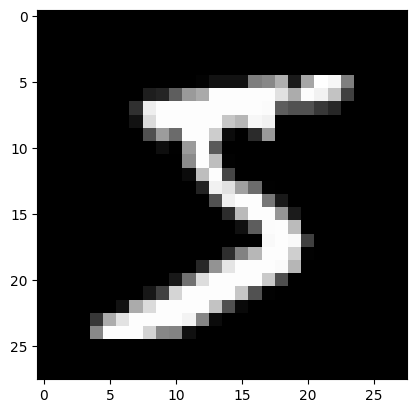

In [7]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray') #손글씨 5

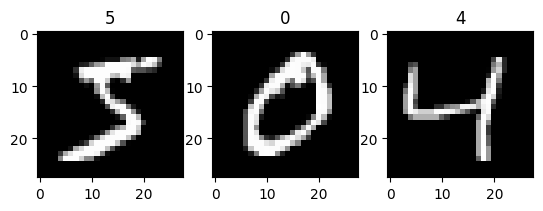

In [8]:
for cnt,x in enumerate(x_train[:3]):
    plt.subplot(1,3,cnt+1)
    plt.imshow(x,cmap='gray')
    plt.title(y_train[cnt])

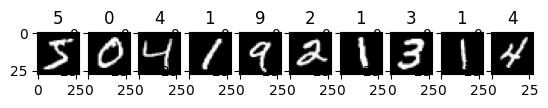

In [9]:
num = 10
for cnt,x in enumerate(x_train[:num]):
    plt.subplot(1,num,cnt+1)
    plt.imshow(x,cmap='gray')
    plt.title(y_train[cnt])

In [10]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [12]:
np.shape(x_train[0])
x_train[0].ndim

2

In [13]:
np.unique(x_train[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


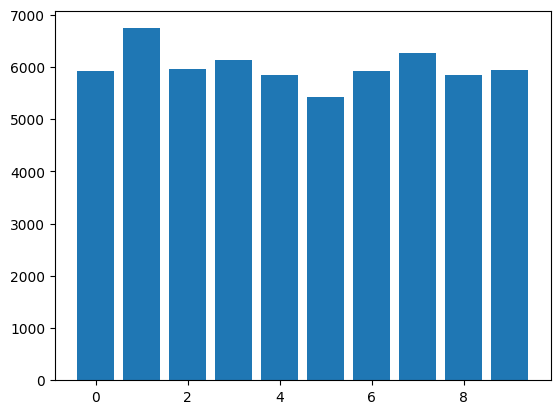

In [15]:
def plot(dataX,dataY, num=10):
    plt.figure(figsize=(20,20))

    for cnt,x in enumerate(dataX[:num]):
        plt.subplot(1,num,cnt+1)
        plt.imshow(x, cmap='gray')
        plt.title(dataY[cnt])

def count(data):
    tmp = np.unique(data,return_counts=True)
    print(tmp)
    plt.bar(tmp[0], tmp[1])

count(y_train)

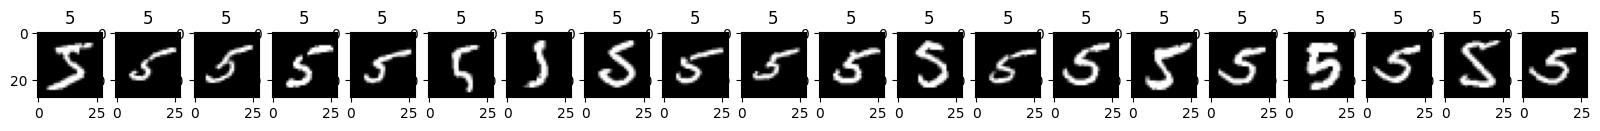

In [16]:
## 숫자 5가 있는 모든 x와y를 별도로 저장

newX=[]
newY=[]
select_num = 5
for x,y in zip(x_train,y_train):
    if y==select_num :
        newX.append(x)
        newY.append(y)


len(newY)
plot(newX,newY,20)

In [17]:
x_train[0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.14117647,
       0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
       0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
       0.        , 0.        , 0.        ])

In [18]:
np.shape(x_train), np.shape(y_train)



((60000, 28, 28), (60000,))

In [19]:
### 모델제작

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), ##28*28의 크기로 하겠다.(즉 x변수가 784개임) np.shape(x_train)과 같아야함.
  tf.keras.layers.Dense(128, activation='relu'), ## W가 784개 생성되는데, 그런 경우를 128개의 경우를 만들자
  tf.keras.layers.Dropout(0.2), ## 784개의 w가 128개의 경우의 수로 생성. 총 생성되는 w는 784*128. 이 중 20%는 0으로 만들자.
  tf.keras.layers.Dense(10, activation='softmax') #손글씨 이미지를 0,1,2,3,4,5,6,7,8,9의 10개의 숫자 중 어떤 숫자인가 1개 맞추기
                                                # np.unique(y_train)의 max값 +1 (0부터 시작하니깐 10개. 원핫인코딩해야되는거라 중간에 8없어도 괜찮음.)
])

##배치사이즈, 오차계산법(경사하강, 오차역전파), 화면에 보여줄 값 지정 설정.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


##모델컴파일러에서 모델을 갖고 와서 순전파와 역전파를 진행하고,
## w,b를 계속 갱신하면서 전체 데이터를 에포크만큼 반복하자

model.fit(x_train, y_train, epochs=10, validation_data= (x_test,y_test)) ###트레이닝 자료를 이용해서 w,b를 갱신

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2940 - accuracy: 0.9151 - val_loss: 0.1439 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9581 - val_loss: 0.1033 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.0837 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9734 - val_loss: 0.0746 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0750 - accuracy: 0.9767 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 0.0688 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 0.0734 - val_accuracy:

In [20]:
model.save('c:/data/myMnist.h5')

In [ ]:
## !!!!!!dense들어간건 2개씩 붙음.

In [21]:
####모델 제작 및 save

model(model.lay)


NameError: name 'input_shape' is not defined